# 1. EDA

## Librerías

In [1]:
# Datos
import numpy as np
import pandas as pd

# Visualización
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns

# Funciones
import sys
sys.path.append(r'C:\Users\rodri\Documents\TheBridge\Carpeta de trabajo\carpeta_alumno_R\Machine Learning\Proyecto_ML_RodrigoArribas\src\utils')
from functions import *
from constants import *

## Carga de datos

In [75]:
train = pd.read_csv(r'..\data\raw\train.csv')
test = pd.read_csv(r'..\data\raw\test.csv')

## Procesado básico

In [76]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [77]:
# Procesado 
train_p = train.copy()
test_p = test.copy()

# Lowercase
train_p = train_p.rename(columns=str.lower)
test_p = test_p.rename(columns=str.lower)

# gender
train_p.rename(columns={'gender':'male'}, inplace=True)
train_p['male'] = train_p['male'].map({'Female':0, 'Male':1})
test_p.rename(columns={'gender':'male'}, inplace=True)
test_p['male'] = test_p['male'].map({'Female':0, 'Male':1})

# binary_cols
binary_cols = ['family_history_with_overweight', 'favc', 'smoke', 'scc']
for column in binary_cols:
    train_p[column] = train_p[column].map({'no':0, 'yes':1})
    test_p[column] = test_p[column].map({'no':0, 'yes':1})


In [78]:
# Guardado
train_p.to_csv(r'..\data\processed\train_1.csv', index=False)
test_p.to_csv(r'..\data\processed\test_1.csv', index=False)

## Primera exploración

In [2]:
train = pd.read_csv(r'..\data\processed\train_1.csv')

# Describe
train.drop(columns='id').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   male                            20758 non-null  int64  
 1   age                             20758 non-null  float64
 2   height                          20758 non-null  float64
 3   weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   favc                            20758 non-null  int64  
 6   fcvc                            20758 non-null  float64
 7   ncp                             20758 non-null  float64
 8   caec                            20758 non-null  object 
 9   smoke                           20758 non-null  int64  
 10  ch2o                            20758 non-null  float64
 11  scc                             20758 non-null  int64  
 12  faf                             

In [18]:
# Datos faltantes
train.isna().sum()

id                                0
male                              0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
dtype: int64

In [23]:
# Duplicados
train[train.drop(columns='id').duplicated(keep=False)]

,id,male,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad


In [58]:
# Estadísticas principales
train.drop(columns='id').describe(include='all', percentiles=percentiles)

,male,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758,20758,20758
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,5,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17529,NaN,NaN,NaN,NaN,NaN,15066,16687,4046
mean,0.497929,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,NaN,0.011803,2.029418,0.033096,0.981747,0.616756,NaN,NaN,NaN
std,0.500008,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,NaN,0.108000,0.608467,0.178891,0.838302,0.602113,NaN,NaN,NaN
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
10%,0.000000,18.000000,1.599867,51.132809,0.000000,1.000000,2.000000,1.079031,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,NaN,0.000000,1.792022,0.000000,0.008013,0.000000,NaN,NaN,NaN
50%,0.000000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,NaN,0.000000,2.000000,0.000000,1.000000,0.573887,NaN,NaN,NaN


## EDA

### **Target**: nobeyesdad

In [3]:
# Categorizamos columna

from pandas.api.types import CategoricalDtype

obesity_types = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
obesity_cat = CategoricalDtype(categories=obesity_types, ordered=True)

train['nobeyesdad'] = train['nobeyesdad'].astype(obesity_cat)

In [ ]:
# ax = sns.countplot(data=train, x='nobeyesdad', stat='percent', order=obesity_types)
# for container in ax.containers:
#     ax.bar_label(container)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30);

C:\Users\rodri\Documents\TheBridge\Carpeta de trabajo\carpeta_alumno_R\Machine Learning\Proyecto_ML_RodrigoArribas\src\utils\functions.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


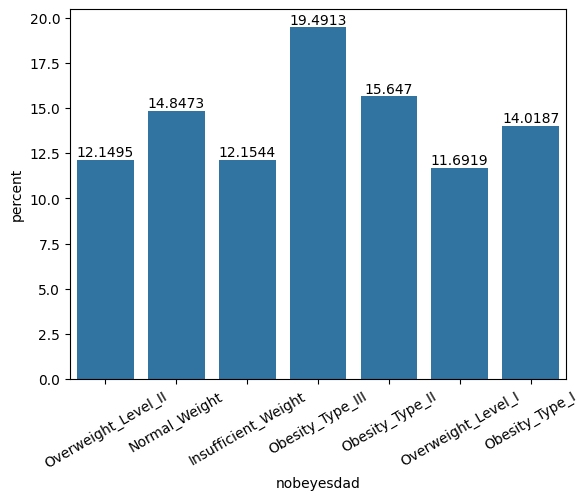

In [5]:
conteo(df=train, variable='nobeyesdad', stat='percent');